In [33]:
import time
import os
import sys
import numpy as np
import matplotlib
matplotlib.use('nbagg')
#from matplotlib import style
#style.use('ggplot')
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from astropy import stats
from astropy.io import fits
from mmtwfs.wfs import *
from mmtwfs.zernike import ZernikeVector

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
mmirs = WFSFactory(wfs="mmirs", nzern=23)

In [10]:
mmirs.modes['mmirs1']['reference']['fwhm']

2.0806539916959954

In [11]:
spot = mmirs.modes['mmirs1']['reference']['spot']
model = Gaussian2D(amplitude=spot.max(), x_mean=spot.shape[1]/2, y_mean=spot.shape[0]/2) + Polynomial2D(degree=0)
#model = Gaussian2D(amplitude=spot.max(), x_mean=spot.shape[1]/2, y_mean=spot.shape[0]/2)
fitter = LevMarLSQFitter()
y, x = np.mgrid[:spot.shape[0], :spot.shape[1]]
fit = fitter(model, x, y, spot)

<IPython.core.display.Javascript object>


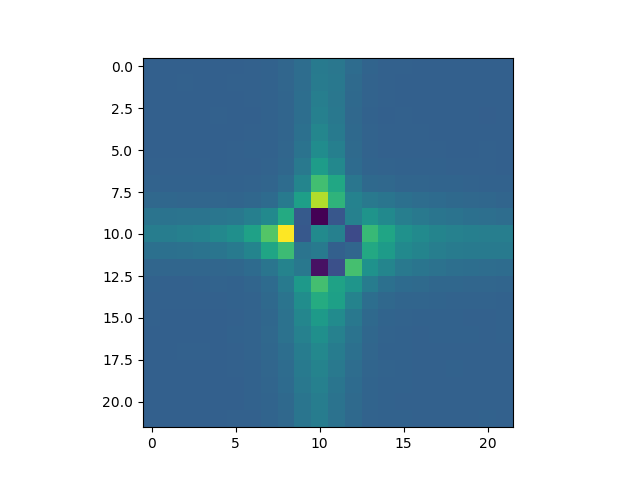

In [12]:
plt.imshow(mmirs.modes['mmirs1']['reference']['spot'] - fit(x, y))
plt.show()

<IPython.core.display.Javascript object>


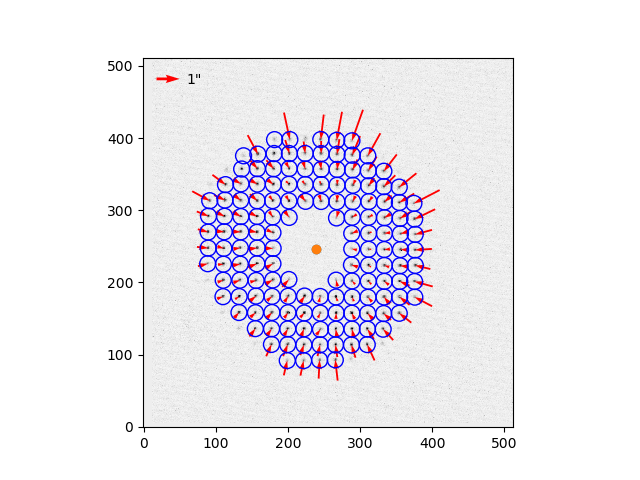

<Quantity 0.505701445189283 arcsec>

In [77]:
mmirs_file = "/Users/tim/MMT/wfsdat/20170416/rawdata/mmirs_wfs_%04d.fits" % 25
results = mmirs.measure_slopes(mmirs_file, plot=True)
plt.show()
time.sleep(1)
results['seeing']

In [73]:
results['raw_seeing']

<Quantity 0.5329655844757835 arcsec>

In [74]:
results['header']['AIRMASS']

1.16

366.7213413762874 nm
Normalized (Noll) Coefficients
 Z02:       643 nm 	 X Tilt (1, 1)
 Z03:       432 nm 	 Y Tilt (1, -1)
 Z04:       130 nm 	 Defocus (2, 0)
 Z05:      4.37 nm 	 Primary Astig at 45˚ (2, -2)
 Z06:      84.7 nm 	 Primary Astig at 0˚ (2, 2)
 Z07:      -113 nm 	 Primary Y Coma (3, -1)
 Z08:      -200 nm 	 Primary X Coma (3, 1)
 Z09:      20.2 nm 	 Y Trefoil (3, -3)
 Z10:     -87.5 nm 	 X Trefoil (3, 3)
 Z11:       107 nm 	 Primary Spherical (4, 0)
 Z12:     -50.6 nm 	 Secondary Astigmatism at 0˚ (4, 2)
 Z13:      49.7 nm 	 Secondary Astigmatism at 45˚ (4, -2)
 Z14:        11 nm 	 X Tetrafoil (4, 4)
 Z15:     -27.1 nm 	 Y Tetrafoil (4, -4)
 Z16:      48.3 nm 	 Secondary X Coma (5, 1)
 Z17:      45.3 nm 	 Secondary Y Coma (5, -1)
 Z18:        32 nm 	 Secondary X Trefoil (5, 3)
 Z19:     -8.82 nm 	 Secondary Y Trefoil (5, -3)
 Z20:      28.7 nm 	 X Pentafoil (5, 5)
 Z21:       8.5 nm 	 Y Pentafoil (5, -5)
 Z22:     -92.4 nm 	 Secondary Spherical (6, 0)
 Z23:     -69.1 nm 	 

<IPython.core.display.Javascript object>


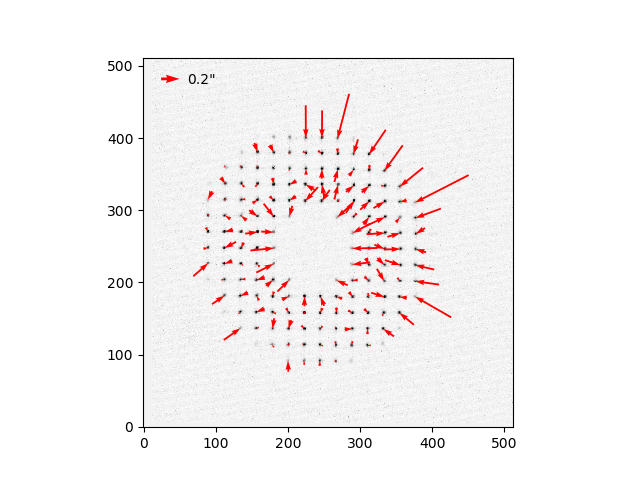

In [19]:
zresults = mmirs.fit_wavefront(results, plot=True)
zv = zresults['zernike']
print(zresults['residual_rms'])
zv.normalize()
print(zv)
plt.show()

<IPython.core.display.Javascript object>


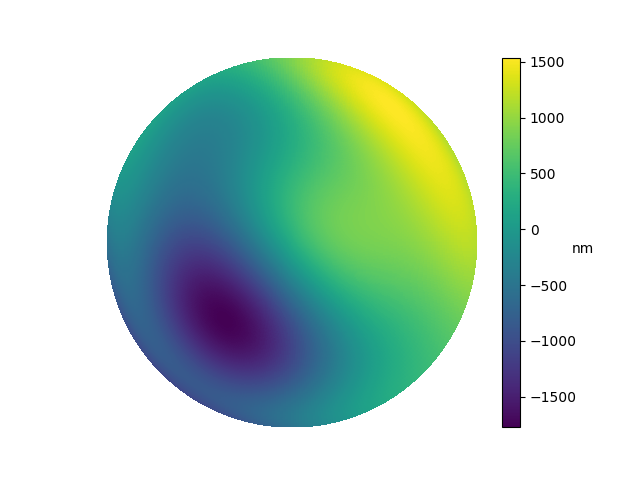

<Quantity 770.6257822087113 nm>

In [18]:
zv.plot_map()
plt.show()
zv.rms

In [21]:
np.sqrt(zresults['residual_rms']**2 / (zresults['residual_rms']**2 + zv.rms**2))

<Quantity 0.4297011620426941>

In [ ]:
psf = mmirs.telescope.psf(zv)
plt.imshow(psf[0].data, extent=[-0.5, 0.5, -0.5, 0.5])
plt.show()

In [ ]:
from astroscrappy import detect_cosmics

In [ ]:
mask, newim = detect_cosmics(results['data'])

In [ ]:
plt.imshow(results['data']-newim, origin='lower')
plt.show()

In [ ]:
im = results['data']
back = background(im, h=0.7)
subt = im - back

ycen, xcen = 232, 249
n = im.shape[0]
r = 0.5*n
y, x = np.ogrid[-ycen:n-ycen, -xcen:n-xcen]

mask = x**2 + y**2 < r**2
subt[mask] = np.nan

norm = visualization.ImageNormalize(
    subt,
    interval=visualization.ZScaleInterval(),
    stretch=visualization.AsinhStretch()
)
plt.imshow(subt, norm=norm, origin='lower')
plt.show()
s = subt.copy()
np.nanstd(s)

In [ ]:
back_subs = np.where()

# F/9 Dev Section

In [ ]:
f9wfs = WFSFactory(wfs="f9", nzern=20)
f9_file = "/Users/tim/MMT/wfsdat/20170318/TREX_p500_0000.fits"
results = f9wfs.measure_slopes(f9_file, 'blue', plot=True)
plt.show()
# 265 258
# ref 240 259.5

In [ ]:
f9wfs.modes['blue']['reference']['fwhm']

In [ ]:
plt.imshow(f9wfs.modes['blue']['reference']['spot'])
plt.show()

In [ ]:
zresults = f9wfs.fit_wavefront(results, plot=True)
#zresults['zernike'].rotate(90*u.deg)
print(zresults['zernike'])
plt.show()

In [ ]:
int(zresults['zernike']['Z10'].value)

In [ ]:
zv = zresults['zernike']
zv.ignore('Z02')
zv.ignore('Z03')
zv.plot_map()
plt.show()

In [ ]:
psf = f9wfs.telescope.psf(zv, fov=1.0)
plt.imshow(psf[0].data, extent=[-0.5, 0.5, -0.5, 0.5])
plt.show()

In [ ]:
ztest = ZernikeVector(Z04=750*u.nm)
psf = f9wfs.telescope.psf(ztest, fov=1.0)
plt.imshow(psf[0].data, extent=[-0.5, 0.5, -0.5, 0.5])
plt.show()

# F/5 Dev Section

In [ ]:
f5wfs = WFSFactory(wfs="f5", nzern=20)
f5_file = "/Users/tim/MMT/wfsdat/20170301/auto_wfs_0037_ave.fits"
results = f5wfs.measure_slopes(f5_file, 'hecto', plot=True)
plt.show()

In [ ]:
zresults = f5wfs.fit_wavefront(results, plot=True)
zv = zresults['zernike']
print(zv)
print(zv.rms)
plt.show()

In [ ]:
f5wfs.modes['hecto']['reference']['fwhm']

In [ ]:
zv.plot_map()
plt.show()
zresults['residual_rms']

In [ ]:
zv.ignore('Z02')
zv.ignore('Z03')
zv.ignore('Z04')
print(zv.rms)
zv.plot_map()
plt.show()

In [ ]:
zresults['rot_zernike'] - zresults['zernike']

In [ ]:
zv.ignore('Z02')
zv.ignore('Z03')
print(zv.rms)
zv.plot_map()
plt.show()

In [ ]:
pup = f5wfs.pupil_mask(rotator=0)
plt.imshow(pup)
plt.show()

In [ ]:
im = check_wfsdata(f5_file)
back = background(im, h=0.9)
plt.imshow(im-back, origin='lower')
plt.show()

In [ ]:
subt = im - back
fits.writeto("blah.fits", subt, overwrite=True)

# Scratch space

In [ ]:
cen = center_pupil(subt, pup, plot=True)
print(cen)
plt.show()

In [ ]:
from astropy.io import ascii

In [ ]:
t = f9wfs.telescope
m = t.zern_map

In [ ]:
z = np.loadtxt("/Users/tim/MMT/wfsdat/20170110/mmirs_wfs_0375.dao.sub.zrn.cor")
z1 = np.loadtxt("/Users/tim/MMT/wfsdat/20170110/mmirs_wfs_0375.dao.av.zrn")

In [ ]:
z1 - z

In [ ]:
Z = ZernikeVector(coeffs=z, zmap=m)

In [ ]:
Z

In [ ]:
from astropy.table import Table
from astropy.io import ascii

In [ ]:
t = ascii.read("/Users/tim/MMT/mmtwfs/mmtwfs/data/mmirszernfield.tab")

In [ ]:
t

In [ ]:
np.interp(0.12, t['field_r'], t['Z01'])

In [ ]:
range(4, 11)

In [ ]:
for i in range(4, 12):
    print("Z%02d" % i)

In [ ]:
np.max(1, 2)

In [ ]:
6.75 + 20.30 + 242.15 + 430.51

In [ ]:
13296 - (973.15/.575) - 1025.8

In [ ]:
23*6 + 12*6

In [ ]:
58.69*12

In [ ]:
210+16+69.5+704.28

In [ ]:
2225.37 - (977.15 + 999.78 + 699.71)

In [ ]:
103212.81+341.47-451.27+9632.5

In [ ]:
7324.5+3951.34

In [ ]:
112735.51 - (11275.84 + 7245.8 + 56) - 12150

In [ ]:
4050*3

In [ ]:
3000*.05

In [ ]:
28910/98610

In [ ]:
ai = [247.68, 252.69, 257.79, 261.79, 266.88, 696.98, 280.11, 261.96, 261.96, 261.92, 261.96]
pep = [146.43, 147.28, 145.18, 142.83, 140.7, 138.47, 136.4, 134.18, 132.18, 129.89, 128.12, 126.22]

In [ ]:
0.2* (28910/98610 * (np.sum(ai) + np.sum(pep)))

In [ ]:
len(pep)

In [ ]:
12049 - (290.81 + 850)

In [ ]:
18577.64-7324.5

In [ ]:
110940.01-11253.14 - 9600

In [ ]:
0.032 * 90086.87 + 4226.63

In [ ]:
x = 1920 * 5.86e-3 * u.mm

y = 1200 * 5.86e-3 * u.mm

In [ ]:
np.sqrt(x**2 + y**2)

In [22]:
np.max((1, 2))

2

In [23]:
mmirs.pup_size

335

In [31]:
mmirs.modes['mmirs2']['reference']['sigma']

0.90307344549432889

In [55]:
sigma = results['fwhm'] * stats.funcs.gaussian_fwhm_to_sigma

wave = 650 * u.nm
wave = wave.to(u.m).value  # r_0 equation expects meters so convert
# calculate the physical size of each aperture.
ref = mmirs.modes['mmirs2']['reference']
apsize_pix = np.max((ref['xspacing'], ref['yspacing']))
d = mmirs.telescope.diameter * apsize_pix / mmirs.pup_size
d = d.to(u.m).value  # r_0 equation expects meters so convert

# we need to deconvolve the instrumental spot width from the measured one
ref_sigma = ref['sigma']
if sigma > ref_sigma:
    corr_sigma = np.sqrt(sigma**2 - ref_sigma**2)
else:
    corr_sigma = 0.0
corr_sigma *= mmirs.pix_size.to(u.rad).value  # r_0 equation expects radians so convert
# this equation relates the motion within a single aperture to the characteristic scale size of the
# turbulence, r_0.
r_0 = ( 0.179 * (wave**2) * (d**(-1./3.))/corr_sigma**2 )**0.6
print(r_0)
# this equation relates the turbulence scale size to an expected image FWHM at the given wavelength.
raw_seeing = u.rad * 0.98 * wave / r_0
raw_seeing = raw_seeing.to(u.arcsec)


0.246527515859


In [69]:
"{0.value:0.2f}{0.unit:unicode}".format(raw_seeing)

'0.53″'

In [40]:
6.5/14

0.4642857142857143

In [54]:
np.sqrt(sigma**2 - ref_sigma**2)

1.3393022334585623